In [7]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [10]:
#### Paths to data tables ####

## Health outcomes ##

# Life expectancy
life_expectancy = "Resources/life_expectancy.csv"

# Avoidable mortality
avoidable_mortality = "Resources/avoidable_mortality.csv"

# Heart disease
heart_disease_mortality = "Resources/heart_disease_mortality.csv"

# Infant mortality 
infant_mortality = "Resources/infant_mortality.csv"

# Maternal mortality
maternal_mortality = "Resources/maternal_mortality.csv"


## Financial data ##

# Health expenditure and financing
expenditure_financing = "Resources/expenditure_financing.csv"

# Health expenditure from 2015
expenditure_2015 = "Resources/expenditure_financing_2015.csv"

# Percent insured
percent_insured = "Resources/percent_insured.csv"

# Percentage GDP
percent_gdp = "Resources/percent_gdp.csv"

# Types of government financing schemes
schemes = "Resources/ugh_schemes.csv"

In [11]:
life_expectancy_file = pd.read_csv(life_expectancy)
avoidable_mortality_file = pd.read_csv(avoidable_mortality)
infant_mortality_file = pd.read_csv(infant_mortality)
maternal_mortality_file = pd.read_csv(maternal_mortality)
heart_disease_mortality_file = pd.read_csv(heart_disease_mortality)
expenditure_financing_file = pd.read_csv(expenditure_financing)
expenditure_2015_file = pd.read_csv(expenditure_2015)
percent_insured_file = pd.read_csv(percent_insured)
percent_gdp_file = pd.read_csv(percent_gdp)
schemes_file = pd.read_csv(schemes)

In [13]:
# Life expectancy 

life_expectancy_file = life_expectancy_file[["Country", "Year", "Value"]]
life_expectancy_df = life_expectancy_file.rename(columns = {"Value": "Life Expectancy (Years)"})

# Avoidable mortality
avoidable_mortality_file = avoidable_mortality_file[["Country", "Year", "Value"]]
avoidable_mortality_df = avoidable_mortality_file.rename(columns = {"Value": "Avoidable Deaths Per 100,000 Population"})

# Infant mortality 
infant_mortality_file = infant_mortality_file[["Country", "Year", "Value"]]
infant_mortality_df = infant_mortality_file.rename(columns = {"Value": "Infant Mortality (Deaths per 1,000 Live Births)"})

# Maternal mortality
maternal_mortality_file = maternal_mortality_file[["Country", "Year", "Value"]]
maternal_mortality_df = maternal_mortality_file.rename(columns = {"Value": "Maternal Mortality (Deaths per 100,000 Live Births)"})

# Heart disease mortality
heart_disease_mortality_file = heart_disease_mortality_file[["Country", "Year", "Value"]]
heart_disease_mortality_df = heart_disease_mortality_file.rename(columns = {"Value": "Death from Heart Disease per 100,000 Population"})

# Percent GDP spent on health over 20 years
percent_gdp_file = percent_gdp_file[["Country", "Year", "Value"]]
percent_gdp_df = percent_gdp_file.rename(columns = {"Value": "Percent of GDP Spent on Health Care"})

# Health expenditure per capita from 2018
expenditure_financing_file = expenditure_financing_file[["Country", "Year", "Value"]]
expenditure_financing_df = expenditure_financing_file.rename(columns = {"Value": "Health Expenditure Per Capita, Current Prices, Current PPP"})

# Health expenditure from 2015
expenditure_2015_file = expenditure_2015_file[["Country", "Year", "Value"]]
expenditure_2015_df = expenditure_2015_file.rename(columns = {"Value": "Health Expenditure Per Capita, Current Prices, Current PPP"})

# Percent of population insured
percent_insured_file = percent_insured_file[["Country", "Year", "Value"]]
percent_insured_df = percent_insured_file.rename(columns = {"Value": "Total Percent of Population with Health Insurance"})

# Government schemes, compulsory schemes, and voluntary schemes
schemes_file = schemes_file[["Country", "Year", "Financing scheme", "Value"]]
schemes_df = schemes_file.rename(columns={"Value": "Percent of Total Health Expenditure"})

In [14]:
merge1 = pd.merge(life_expectancy_df, avoidable_mortality_df, on=["Country", "Year"], how='outer')
merge2 = pd.merge(merge1, infant_mortality_df, on=["Country", "Year"], how='outer')
merge3 = pd.merge(merge2, maternal_mortality_df, on=["Country", "Year"], how='outer')
merge4 = pd.merge(merge3, heart_disease_mortality_df, on=["Country", "Year"], how='outer')
merge5 = pd.merge(merge4, expenditure_financing_df, on=["Country", "Year"], how='outer')
merge6 = pd.merge(merge5, percent_insured_df, on=["Country", "Year"], how='outer')

# Rename main table
health_spending = merge6

In [15]:
#### Create a barchart with all countries average financing scheme distribution from 2015-2022 

# Get rid of year column because we're taking an average
schemes_df = schemes_df[["Country", "Financing scheme", "Percent of Total Health Expenditure"]]

# Remove Croatia because that data seems to have been recorded incorrectly
schemes_df = schemes_df[schemes_df["Country"] != "Croatia"]

# Unstack Financing schemes so we can make a stacked bar chart
schemes_grouped = schemes_df.groupby(["Country", "Financing scheme"]).mean()
schemes_unstacked = schemes_grouped.unstack("Financing scheme")

# Create the bar chart
legend_labels = ["Compulsory contributory health insurance", "Government schemes", "Voluntary schemes/Household out-of-pocket"]
schemes_chart = schemes_unstacked.plot(kind="bar", stacked=True, figsize = (200, 30))
schemes_chart.tick_params(axis='x', labelsize=50)
schemes_chart.tick_params(axis='y', labelsize=50)
schemes_chart.set_title("Average Financing Scheme Distribution from 2015 - 2022", fontsize=80)
schemes_chart.legend(legend_labels, title="Financing schemes", title_fontsize=50, fontsize=40, loc="lower left")

# Annotate the distributions with the value 
# Got this code from https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in schemes_chart.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    schemes_chart.text(x+width/2,
                       y+height/2,
                       '{:.0f} %'.format(height),
                       horizontalalignment='center', 
                       verticalalignment='center',
                       fontsize=40)

In [16]:
## Identify the top ten countries for health expenditure - Average health expenditure from 2015 to present ##

expenditure_2015_average = expenditure_2015_df.groupby(["Country"]).mean()
expenditure_2015_average.head()
top_10 = expenditure_2015_average.nlargest(10, "Health Expenditure Per Capita, Current Prices, Current PPP")
top_10

,Year,"Health Expenditure Per Capita, Current Prices, Current PPP"
Country,,
United States,2018.5,10887.087125
Switzerland,2018.5,6911.156625
Norway,2018.5,6529.043250
Germany,2018.5,6516.588500
Austria,2018.5,5803.436750
Netherlands,2018.5,5757.967750
Sweden,2018.5,5569.620250
Canada,2018.5,5485.508875
Belgium,2018.5,5485.091875


In [27]:
## Print top 10 countries scheme distribution

ten_schemes = schemes_df[(schemes_df["Country"] == "United States") |
                             (schemes_df["Country"] == "Switzerland") |
                             (schemes_df["Country"] == "Norway") |
                             (schemes_df["Country"] == "Germany") |
                             (schemes_df["Country"] == "Austria") |
                             (schemes_df["Country"] == "Netherlands") |
                             (schemes_df["Country"] == "Sweden") |
                             (schemes_df["Country"] == "Canada") |
                             (schemes_df["Country"] == "Belgium") |
                             (schemes_df["Country"] == "Denmark")
                             ]


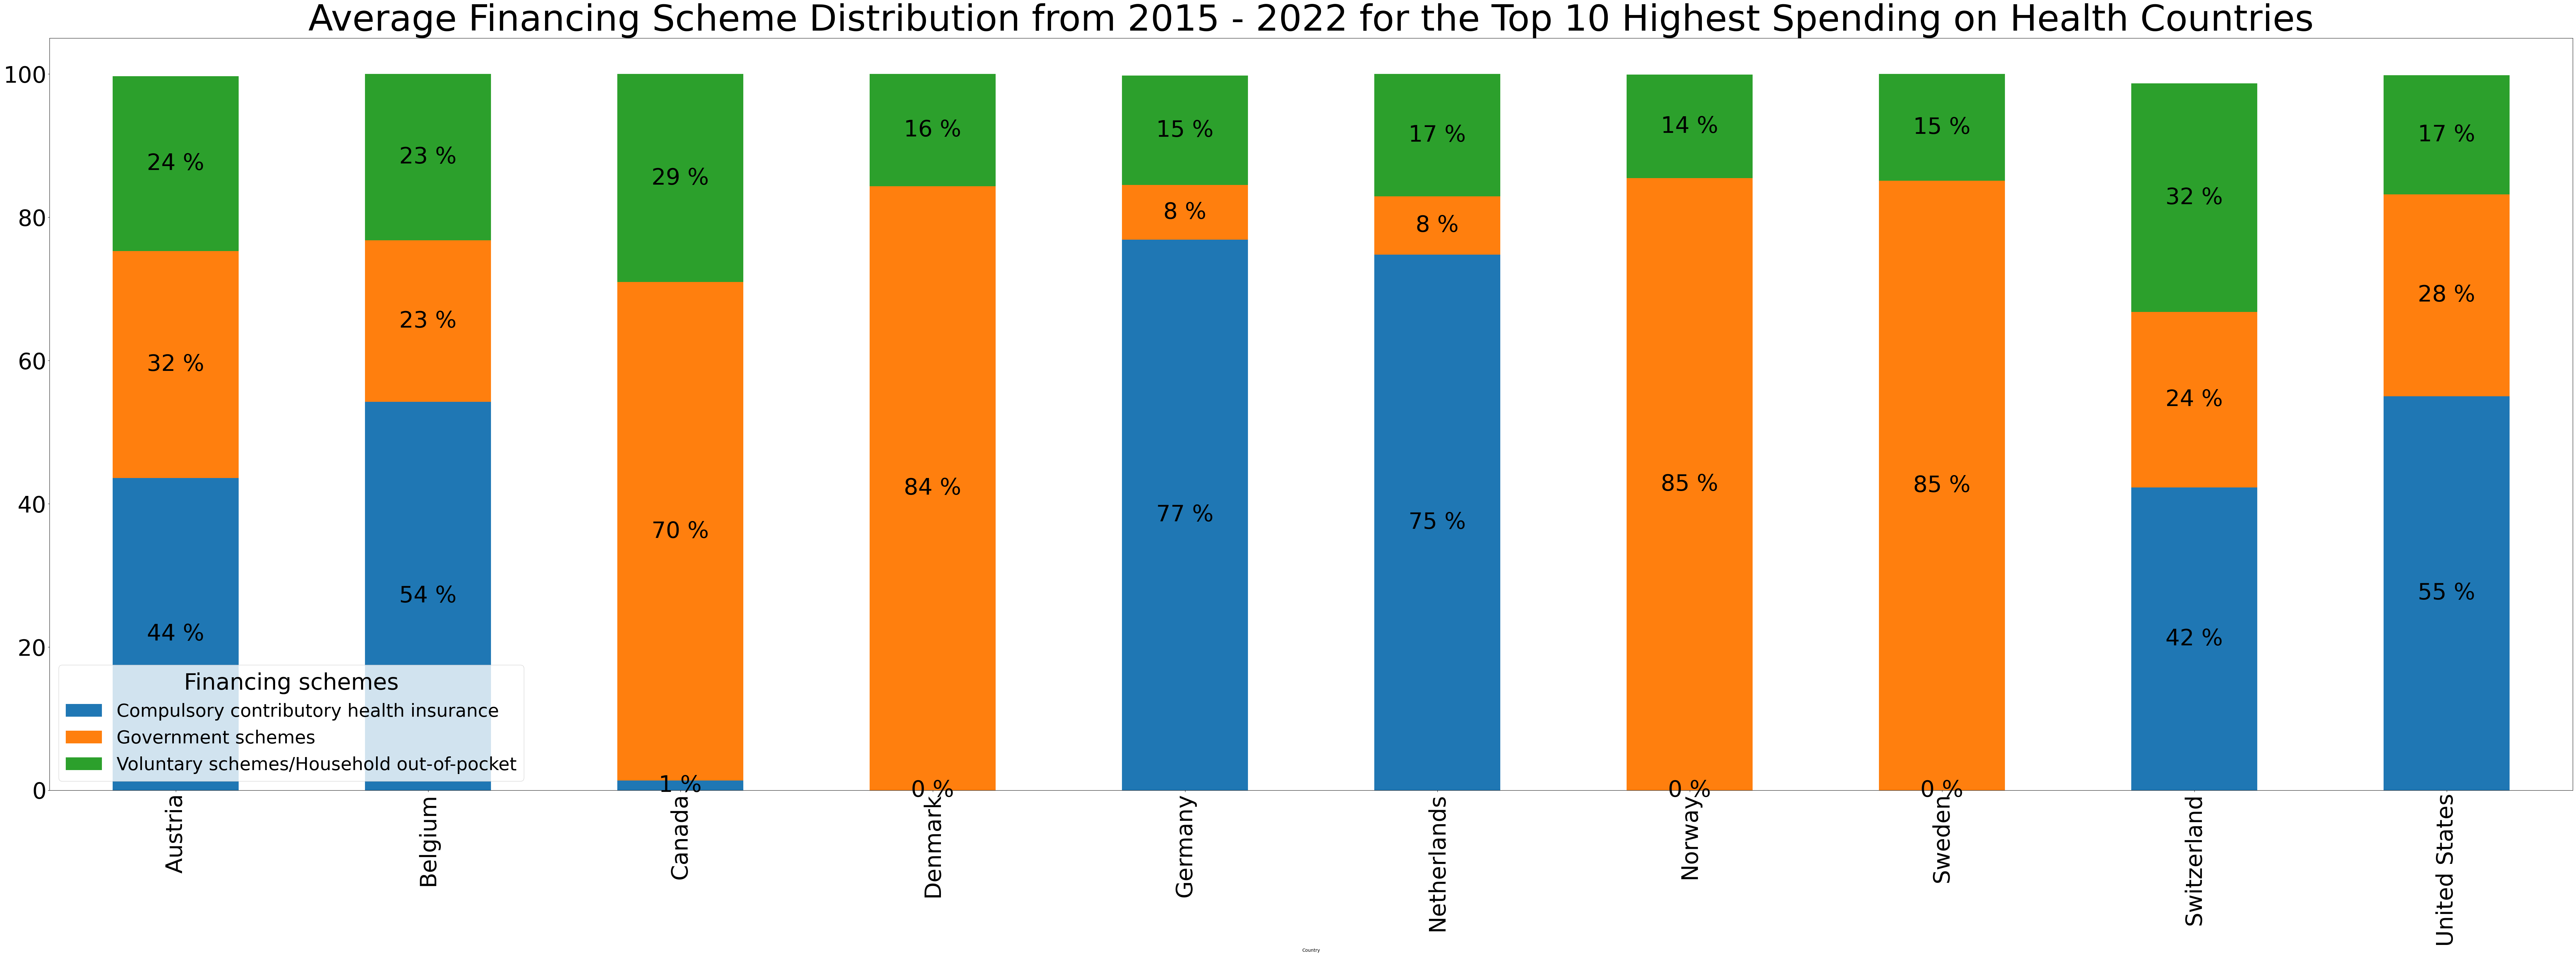

In [18]:
## Make a chart with top ten countries scheme distribution

# Get rid of year column because we're taking an average
ten_schemes_chart = ten_schemes[["Country", "Financing scheme", "Percent of Total Health Expenditure"]]

# Group and unstack Financing schemes so we can make a stacked bar chart
ten_schemes_grouped = ten_schemes_chart.groupby(["Country", "Financing scheme"]).mean()
ten_schemes_unstacked = ten_schemes_grouped.unstack("Financing scheme")

# Create the bar chart
legend_labels = ["Compulsory contributory health insurance", "Government schemes", "Voluntary schemes/Household out-of-pocket"]
ten_schemes_chart = ten_schemes_unstacked.plot(kind="bar", stacked=True, figsize = (100, 30))
ten_schemes_chart.tick_params(axis='x', labelsize=50)
ten_schemes_chart.tick_params(axis='y', labelsize=50)
ten_schemes_chart.set_title("Average Financing Scheme Distribution from 2015 - 2022 for the Top 10 Highest Spending on Health Countries", fontsize=80)
ten_schemes_chart.legend(legend_labels, title="Financing schemes", title_fontsize=50, fontsize=40, loc="lower left")

# Annotate the distributions with the value 
# Got this code from https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
for p in ten_schemes_chart.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ten_schemes_chart.text(x+width/2,
                       y+height/2,
                       '{:.0f} %'.format(height),
                       horizontalalignment='center', 
                       verticalalignment='center',
                       fontsize=50)

In [19]:
# Take the mean of each health outcome measure across the main outcomes table
health_spending_avg = health_spending.groupby("Country").mean()
health_spending_avg.head()

,Year,Life Expectancy (Years),"Avoidable Deaths Per 100,000 Population","Infant Mortality (Deaths per 1,000 Live Births)","Maternal Mortality (Deaths per 100,000 Live Births)","Death from Heart Disease per 100,000 Population","Health Expenditure Per Capita, Current Prices, Current PPP",Total Percent of Population with Health Insurance
Country,,,,,,,,
Argentina,2019.5,76.750,296.666667,7.225,NaN,315.966667,2241.172000,NaN
Australia,2019.5,83.025,148.750000,3.225,3.550,168.850000,5558.869000,100.000
Austria,2019.5,81.600,190.000000,2.850,4.725,294.775000,5924.434250,99.900
Belgium,2019.5,81.625,178.000000,3.425,7.600,200.000000,5576.489250,98.625
Brazil,2019.5,74.800,351.000000,12.775,NaN,319.100000,1502.630333,NaN


In [20]:
### Merge average financing scheme table with main health spending v outcomes table
schemes_health_merged = pd.merge(schemes_grouped, health_spending_avg, left_index=True, right_index=True, how='outer')

# Reset index so I can access the financing scheme column for a scatter plot
schemes_health_merged.reset_index(inplace=True)
schemes_health_merged.head()

,Country,Financing scheme,Percent of Total Health Expenditure,Year,Life Expectancy (Years),"Avoidable Deaths Per 100,000 Population","Infant Mortality (Deaths per 1,000 Live Births)","Maternal Mortality (Deaths per 100,000 Live Births)","Death from Heart Disease per 100,000 Population","Health Expenditure Per Capita, Current Prices, Current PPP",Total Percent of Population with Health Insurance
0,Argentina,Compulsory contributory health insurance schemes,36.892800,2019.5,76.750,296.666667,7.225,NaN,315.966667,2241.172,NaN
1,Argentina,Government schemes,26.577600,2019.5,76.750,296.666667,7.225,NaN,315.966667,2241.172,NaN
2,Argentina,Voluntary schemes/household out-of-pocket paym...,36.017333,2019.5,76.750,296.666667,7.225,NaN,315.966667,2241.172,NaN
3,Australia,Compulsory contributory health insurance schemes,1.024833,2019.5,83.025,148.750000,3.225,3.55,168.850000,5558.869,100.0
4,Australia,Government schemes,68.933333,2019.5,83.025,148.750000,3.225,3.55,168.850000,5558.869,100.0


In [21]:
#### Define repeating variables for scatter plots

# Define x axis variables
gov = schemes_health_merged[schemes_health_merged['Financing scheme'] 
                            == "Government schemes"]["Percent of Total Health Expenditure"]
compulsory = schemes_health_merged[schemes_health_merged['Financing scheme'] 
                            == "Compulsory contributory health insurance schemes"]["Percent of Total Health Expenditure"]
voluntary = schemes_health_merged[schemes_health_merged['Financing scheme']
                            == "Voluntary schemes/household out-of-pocket payments"]["Percent of Total Health Expenditure"]

# Identify the United States on the scatter plot
gov_country_name = schemes_health_merged.loc[schemes_health_merged["Financing scheme"]
                                             == "Government schemes"]["Country"]
compulsory_country_name = schemes_health_merged.loc[schemes_health_merged["Financing scheme"]
                                             == "Compulsory contributory health insurance schemes"]["Country"]
voluntary_country_name = schemes_health_merged.loc[schemes_health_merged["Financing scheme"]
                                             == "Voluntary schemes/household out-of-pocket payments"]["Country"]

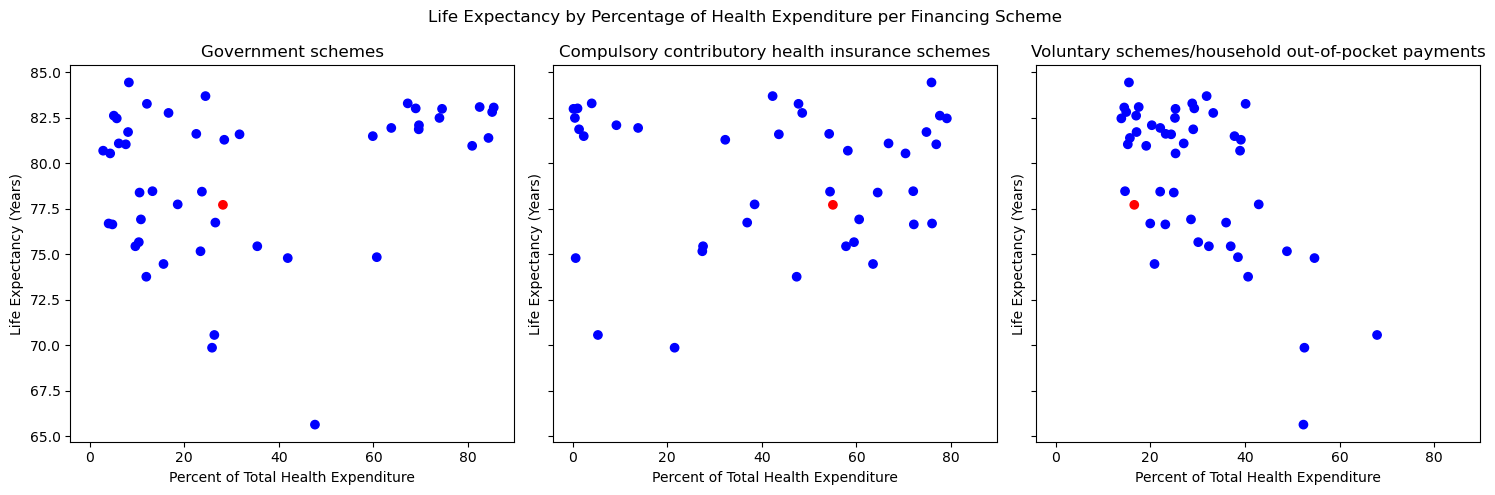

<Figure size 640x480 with 0 Axes>

In [22]:
### Financing scheme v life expectancy plot

# Define y axis variables
y_gov = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Life Expectancy (Years)"]
y_compulsory = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Life Expectancy (Years)"]
y_voluntary = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Life Expectancy (Years)"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

# Modify plots
for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Life Expectancy (Years)")
    ax.set_title(title)

plt.suptitle("Life Expectancy by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.show()

# Name chart for future use
scheme_life_chart = plt.gcf()


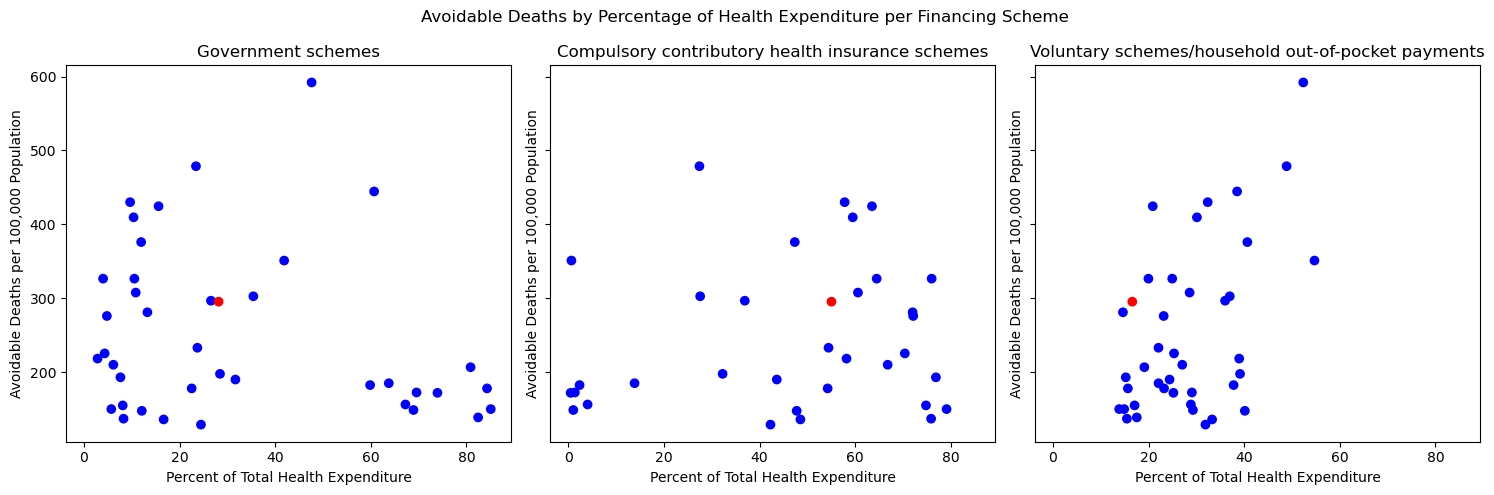

<Figure size 640x480 with 0 Axes>

In [23]:
### Financing scheme v avoidable deaths

# Define y axis variables
y_gov = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Avoidable Deaths Per 100,000 Population"]
y_compulsory = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Avoidable Deaths Per 100,000 Population"]
y_voluntary = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Avoidable Deaths Per 100,000 Population"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

# Modify plots
for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Avoidable Deaths per 100,000 Population")
    ax.set_title(title)

plt.suptitle("Avoidable Deaths by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.show()

scheme_avoidable_death_chart = plt.gcf()

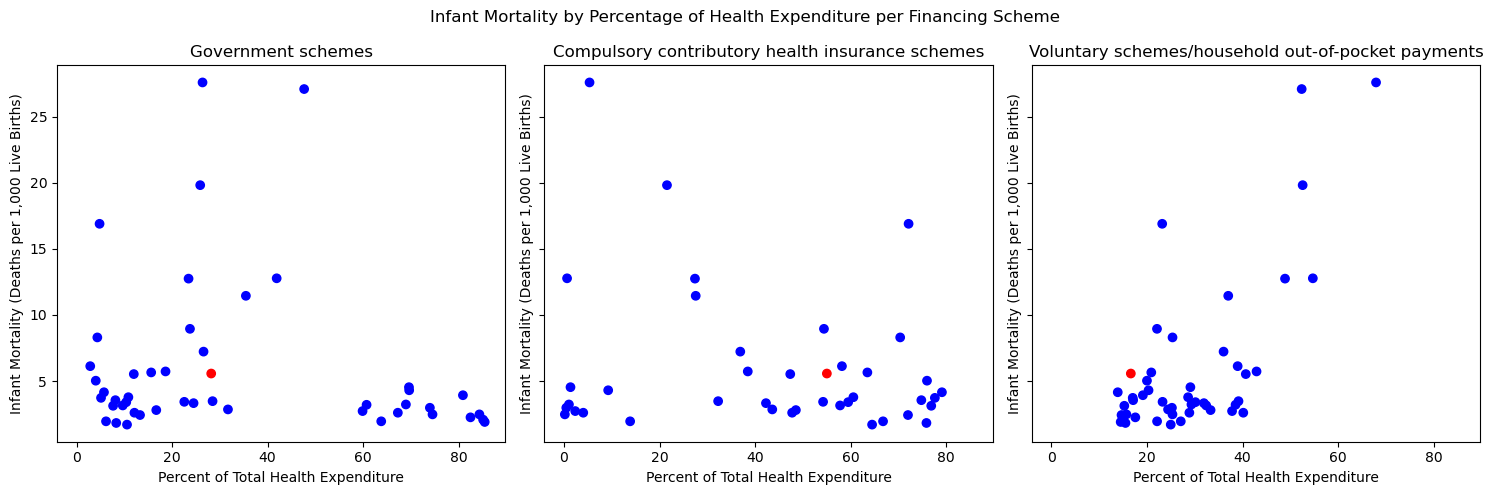

<Figure size 640x480 with 0 Axes>

In [24]:
### Financing scheme v Infant Mortality

# Define y axis variables
y_gov = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Infant Mortality (Deaths per 1,000 Live Births)"]
y_compulsory = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Infant Mortality (Deaths per 1,000 Live Births)"]
y_voluntary = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Infant Mortality (Deaths per 1,000 Live Births)"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Infant Mortality (Deaths per 1,000 Live Births)")
    ax.set_title(title)

plt.suptitle("Infant Mortality by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.show()

scheme_infant_mortality_chart = plt.gcf()


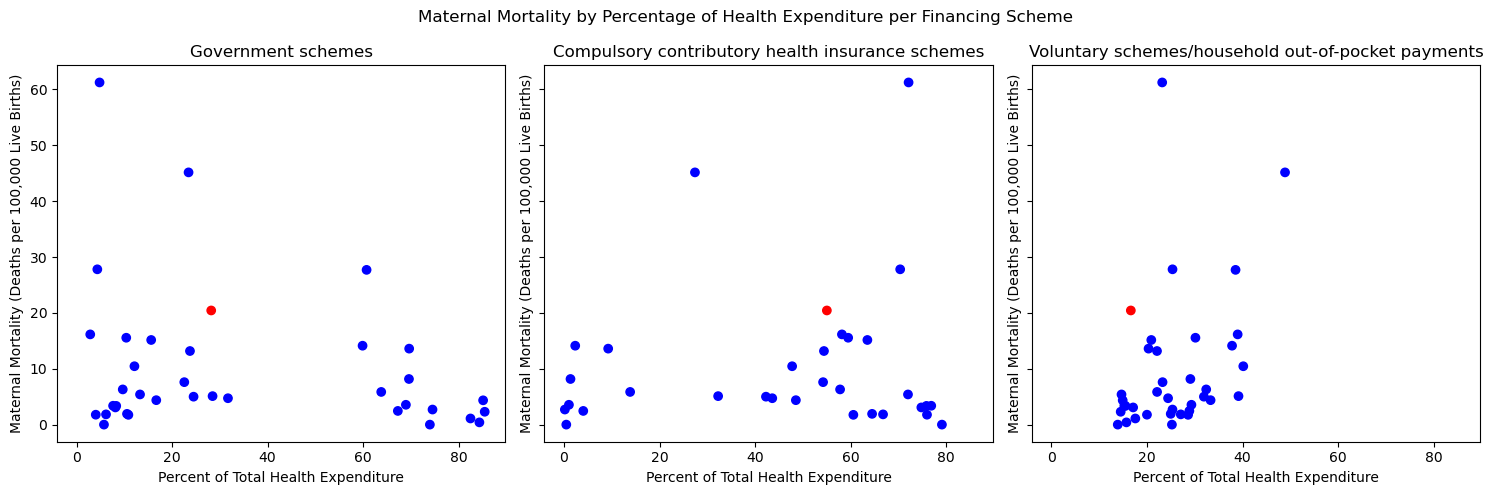

<Figure size 640x480 with 0 Axes>

In [25]:
### Financing scheme v Maternal Mortality

# Define y axis variables
y_gov = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Maternal Mortality (Deaths per 100,000 Live Births)"]
y_compulsory = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Maternal Mortality (Deaths per 100,000 Live Births)"]
y_voluntary = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Maternal Mortality (Deaths per 100,000 Live Births)"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Maternal Mortality (Deaths per 100,000 Live Births)")
    ax.set_title(title)

plt.suptitle("Maternal Mortality by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.show()

scheme_maternal_mortality_chart = plt.gcf()


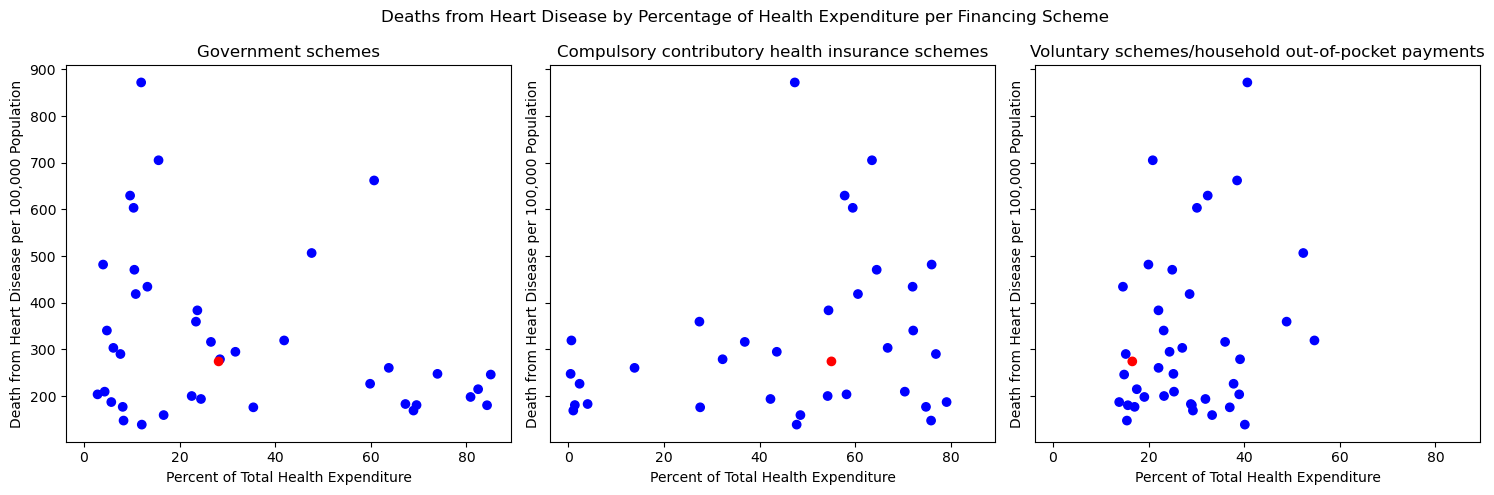

<Figure size 640x480 with 0 Axes>

In [26]:
### Financing scheme v Heart Disease

# Define y axis variables
y_gov = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Death from Heart Disease per 100,000 Population"]
y_compulsory = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Death from Heart Disease per 100,000 Population"]
y_voluntary = schemes_health_merged.loc[schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Death from Heart Disease per 100,000 Population"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Death from Heart Disease per 100,000 Population")
    ax.set_title(title)

plt.suptitle("Deaths from Heart Disease by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.show()

scheme_heart_disease_chart = plt.gcf()